<a href="https://colab.research.google.com/github/anubhav006/Zomato-Data-Analysis/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df = pd.read_csv("zomato.csv", encoding='latin1')
display(df.head())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.shape
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

In [9]:
df.isnull().sum().sort_values(ascending=False)

,0
cuisines,9
restaurant_name,0
country_code,0
city,0
restaurant_id,0
address,0
locality,0
longitude,0
locality_verbose,0
latitude,0


In [10]:
df = df.dropna(subset=['cuisines'])

In [11]:
df.duplicated(subset=['restaurant_id']).sum()


np.int64(0)

In [12]:
df.dtypes

,0
restaurant_id,int64
restaurant_name,object
country_code,int64
city,object
address,object
locality,object
locality_verbose,object
longitude,float64
latitude,float64
cuisines,object


<Axes: ylabel='cuisines'>

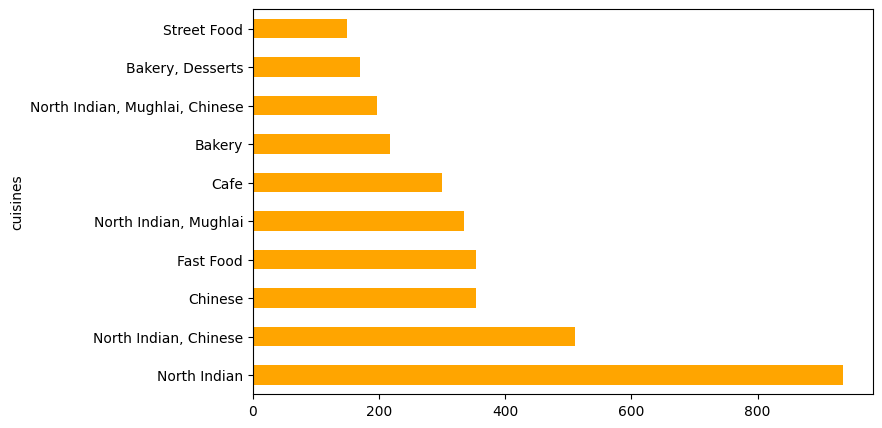

In [17]:
df['cuisines'].value_counts().head(10).plot(kind='barh', figsize=(8,5), color='orange')

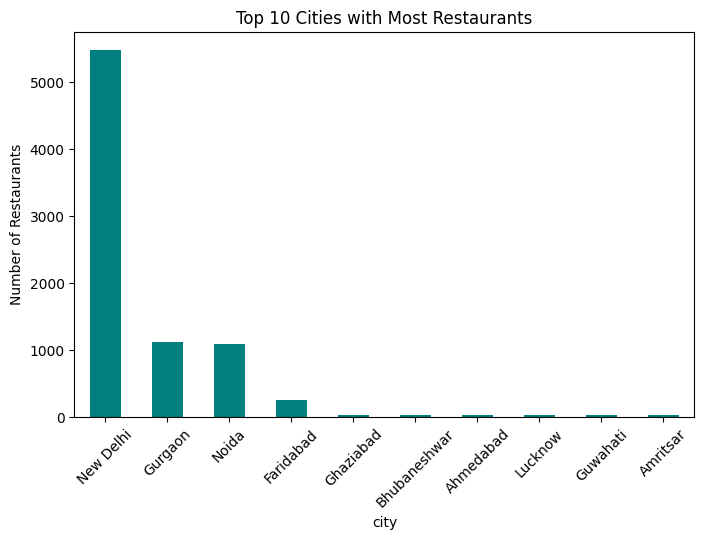

In [19]:
import matplotlib.pyplot as plt
df['city'].value_counts().head(10).plot(kind='bar', figsize=(8,5), color='teal')
plt.title('Top 10 Cities with Most Restaurants')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

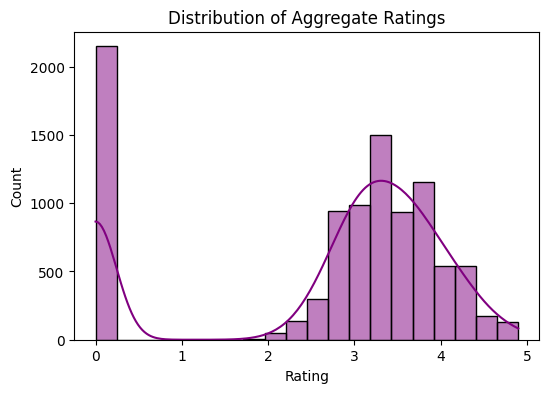

In [21]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df['aggregate_rating'], bins=20, kde=True, color='purple')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.show()

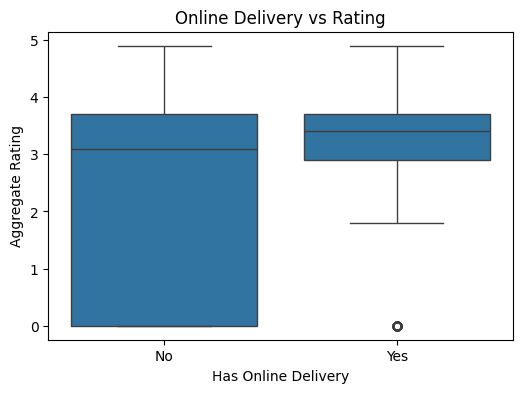

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x='has_online_delivery', y='aggregate_rating', data=df)
plt.title('Online Delivery vs Rating')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')
plt.show()

In [23]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

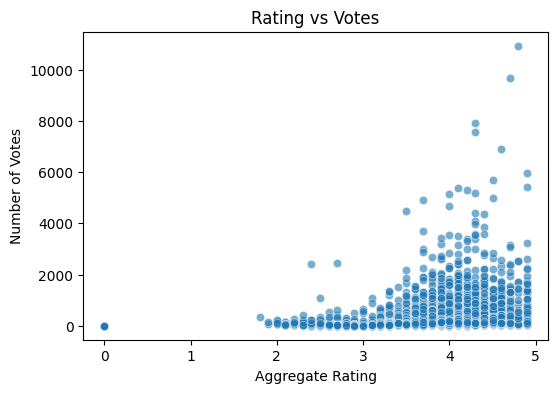

In [24]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='aggregate_rating', y='votes', data=df, alpha=0.6)
plt.title('Rating vs Votes')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Votes')
plt.show()

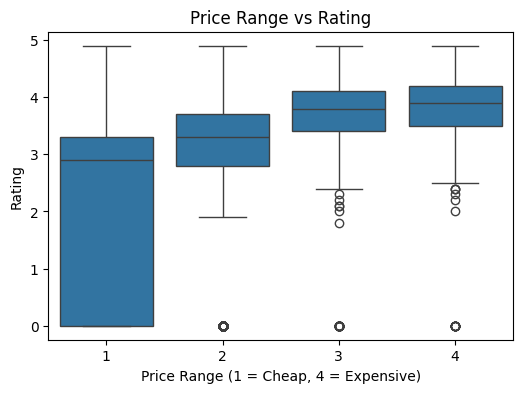

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='price_range', y='aggregate_rating', data=df)
plt.title('Price Range vs Rating')
plt.xlabel('Price Range (1 = Cheap, 4 = Expensive)')
plt.ylabel('Rating')
plt.show()

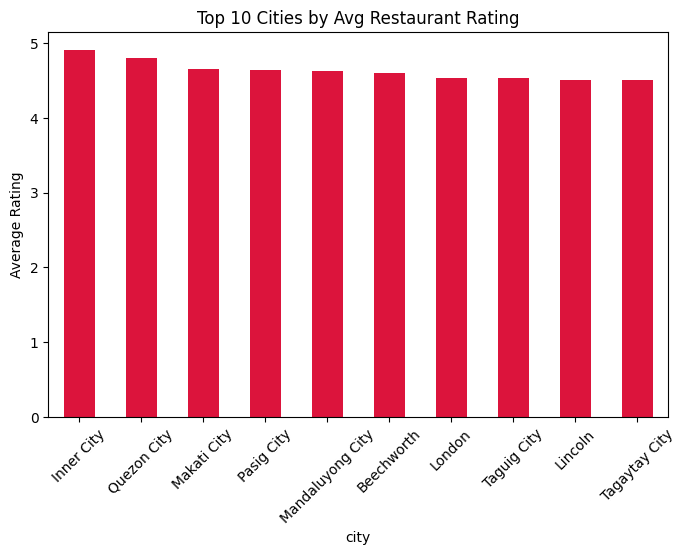

In [26]:
city_ratings = df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False).head(10)

city_ratings.plot(kind='bar', figsize=(8, 5), color='crimson')
plt.title('Top 10 Cities by Avg Restaurant Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [27]:
top_restaurants = df[df['votes'] > 500].sort_values(by=['aggregate_rating', 'votes'], ascending=False).head(10)
top_restaurants[['restaurant_name', 'city', 'aggregate_rating', 'votes', 'cuisines']]

,restaurant_name,city,aggregate_rating,votes,cuisines
2414,Barbeque Nation,Kolkata,4.9,5966,"North Indian, Chinese"
2307,AB's - Absolute Barbecues,Hyderabad,4.9,5434,"European, Mediterranean, North Indian"
2495,Mirchi And Mime,Mumbai,4.9,3244,"North Indian, South Indian, Mughlai"
3013,Naturals Ice Cream,New Delhi,4.9,2620,Ice Cream
374,McGuire's Irish Pub & Brewery,Pensacola,4.9,2238,"Burger, Bar Food, Steak"
9296,Talaga Sampireun,Tangerang,4.9,2212,"Sunda, Indonesian"
3601,Indian Accent - The Manor,New Delhi,4.9,1934,Modern Indian
2409,Barbeque Nation,Kolkata,4.9,1753,"North Indian, Chinese"
9279,Talaga Sampireun,Jakarta,4.9,1662,"Sunda, Indonesian"
9291,Talaga Sampireun,Jakarta,4.9,1640,"Sunda, Indonesian"
